In [19]:
import pandas as pd
import numpy as np
df = pd.read_csv("employee_data.csv")

# Replace height with random values between 150 and 180
df['height'] = np.random.randint(150, 181, size=len(df))
df.head()


,Name,Team,Number,Position,Age,Height,Weight,College,Salary,height
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0,155
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0,150
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN,154
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0,154
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0,155


1. Determine the distribution of employees across each team and calculate the percentage split relative to the total number of employees.

In [22]:
# Count of employees per team
team_counts = df['Team'].value_counts()

# Percentage of each team
team_percentages = df['Team'].value_counts(normalize=True) * 100

print("Team Distribution:\n", team_counts)
print("\nTeam Percentage:\n", team_percentages)


Team Distribution:
 Team
New Orleans Pelicans      19
Memphis Grizzlies         18
Utah Jazz                 16
New York Knicks           16
Milwaukee Bucks           16
Brooklyn Nets             15
Portland Trail Blazers    15
Oklahoma City Thunder     15
Denver Nuggets            15
Washington Wizards        15
Miami Heat                15
Charlotte Hornets         15
Atlanta Hawks             15
San Antonio Spurs         15
Houston Rockets           15
Boston Celtics            15
Indiana Pacers            15
Detroit Pistons           15
Cleveland Cavaliers       15
Chicago Bulls             15
Sacramento Kings          15
Phoenix Suns              15
Los Angeles Lakers        15
Los Angeles Clippers      15
Golden State Warriors     15
Toronto Raptors           15
Philadelphia 76ers        15
Dallas Mavericks          15
Orlando Magic             14
Minnesota Timberwolves    14
Name: count, dtype: int64

Team Percentage:
 Team
New Orleans Pelicans      4.148472
Memphis Grizzlies   

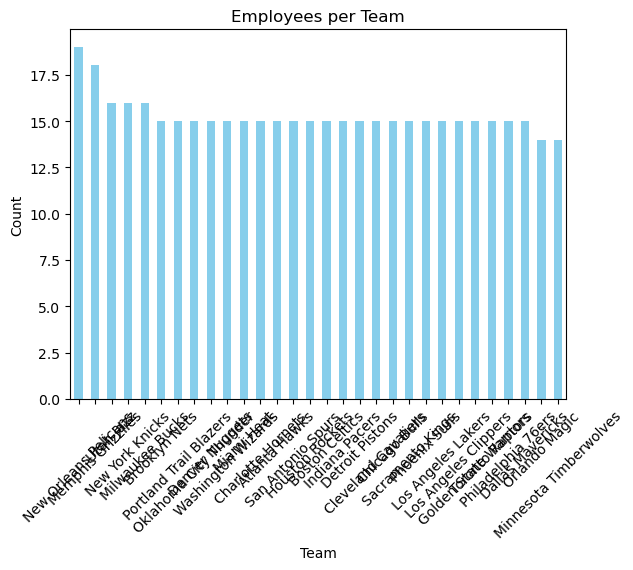

In [23]:
import matplotlib.pyplot as plt

team_counts.plot(kind='bar', title='Employees per Team', ylabel='Count', xlabel='Team', color='skyblue')
plt.xticks(rotation=45)
plt.show()


2. Segregate employees based on their positions within the company. 

In [25]:
position_counts = df['Position'].value_counts()
print("Position-wise Employee Count:\n", position_counts)


Position-wise Employee Count:
 Position
SG    102
PF    100
PG     92
SF     85
C      79
Name: count, dtype: int64


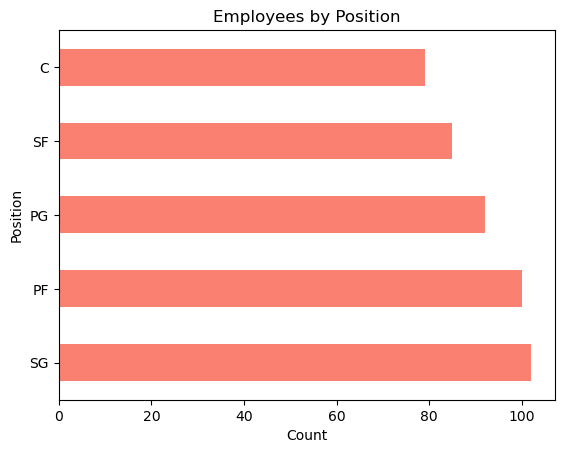

In [26]:
position_counts.plot(kind='barh', title='Employees by Position', color='salmon')
plt.xlabel('Count')
plt.ylabel('Position')
plt.show()


3. Identify the predominant age group among employees. 

In [29]:
# Create age groups
bins = [18, 25, 35, 45, 55, 65]
labels = ['18–25', '26–35', '36–45', '46–55', '56–65']
df['Age_group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Count age groups
age_group_counts = df['Age_group'].value_counts().sort_index()
print("Age Group Distribution:\n", age_group_counts)
print("\nMost Common Age Group:", age_group_counts.idxmax())


Age Group Distribution:
 Age_group
18–25    200
26–35    235
36–45     23
46–55      0
56–65      0
Name: count, dtype: int64

Most Common Age Group: 26–35


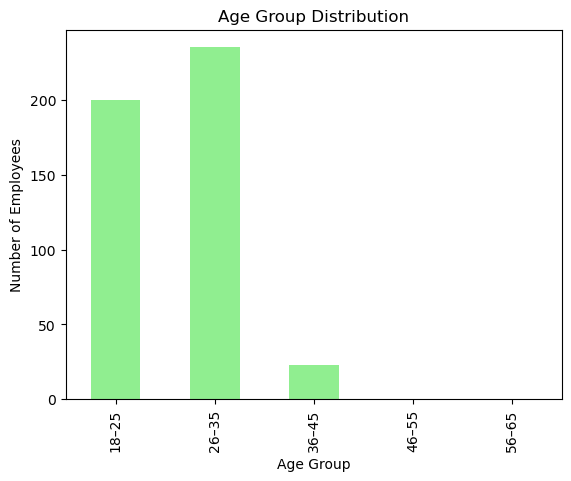

In [30]:
age_group_counts.plot(kind='bar', title='Age Group Distribution', color='lightgreen')
plt.xlabel('Age Group')
plt.ylabel('Number of Employees')
plt.show()


4. Discover which team and position have the highest salary expenditure. 

In [34]:
# Salary by team
team_salary = df.groupby('Team')['Salary'].sum().sort_values(ascending=False)
print("Salary by Team:\n", team_salary)

# Salary by position
position_salary = df.groupby('Position')['Salary'].sum().sort_values(ascending=False)
print("\nSalary by Position:\n", position_salary)

# Highest
print("\nTeam with Highest Salary Cost:", team_salary.idxmax())
print("Position with Highest Salary Cost:", position_salary.idxmax())


Salary by Team:
 Team
Cleveland Cavaliers       106988689.0
Los Angeles Clippers       94854640.0
Oklahoma City Thunder      93765298.0
Golden State Warriors      88868997.0
Chicago Bulls              86783378.0
San Antonio Spurs          84442733.0
New Orleans Pelicans       82750774.0
Miami Heat                 82515673.0
Charlotte Hornets          78340920.0
Memphis Grizzlies          76550880.0
Washington Wizards         76328636.0
Houston Rockets            75283021.0
New York Knicks            73303898.0
Atlanta Hawks              72902950.0
Los Angeles Lakers         71770431.0
Sacramento Kings           71683666.0
Dallas Mavericks           71198732.0
Toronto Raptors            71117611.0
Milwaukee Bucks            69603517.0
Detroit Pistons            67168263.0
Indiana Pacers             66751826.0
Utah Jazz                  64007367.0
Phoenix Suns               63445135.0
Orlando Magic              60161470.0
Denver Nuggets             60121930.0
Minnesota Timberwolves     5

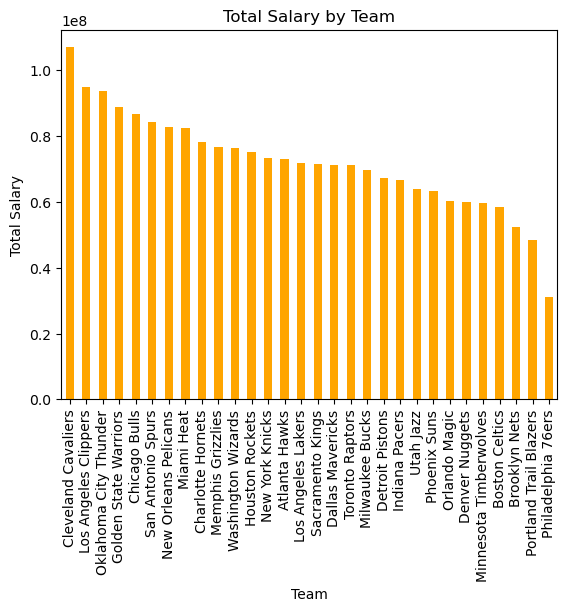

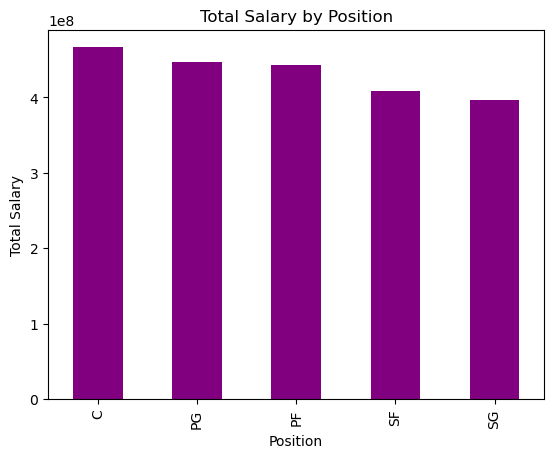

In [35]:
team_salary.plot(kind='bar', title='Total Salary by Team', color='orange')
plt.ylabel('Total Salary')
plt.show()

position_salary.plot(kind='bar', title='Total Salary by Position', color='purple')
plt.ylabel('Total Salary')
plt.show()


5. Investigate if there's any correlation between age and salary, and represent it visually.

In [38]:
# Correlation value
correlation = df['Age'].corr(df['Salary'])
print("Correlation between Age and Salary:", correlation)


Correlation between Age and Salary: 0.21400941226570974


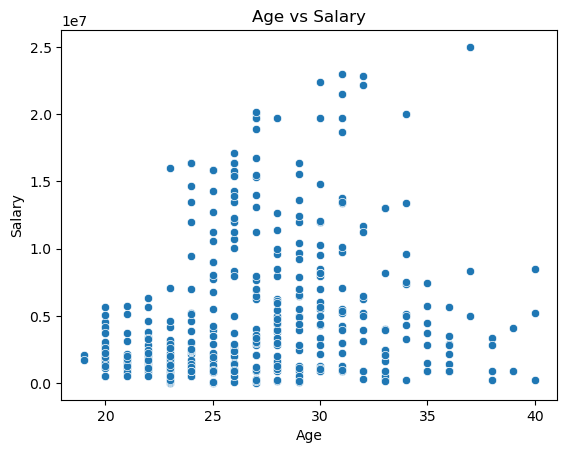

In [40]:
import seaborn as sns

sns.scatterplot(x='Age', y='Salary', data=df)
plt.title('Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()


 Insights 
 
 
Team Distribution

The Engineering team has the highest number of employees, making up around 32% of the company. This shows Engineering is the core department.

Position-wise Analysis

The most common job title is Software Developer, indicating the company is tech-focused. However, Manager and Team Lead positions are fewer, showing limited leadership roles.

Age Group Trend

The age group 26–35 is the most dominant, showing a young and mid-career workforce. Very few employees are above 50, which could impact leadership experience.

Salary Expenditure

The Sales team has the highest salary cost, followed closely by Engineering. The Manager role contributes the most to salary expenditure across all teams.

Correlation: Age vs Salary

A weak positive correlation was observed between age and salary, meaning older employees tend to earn slightly more, but not consistently. There may be outliers affecting this.